In [24]:
#Ridge Method
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Elastic, ElasticCV
from sklearn import datasets


In [25]:
#Import Data and Extract Features and Dependend Variable
train = pd.read_csv("./data/cleaned_standardized_fe.csv")
features = train.drop('SalePrice', axis = 1)
price = train['SalePrice'] 

In [26]:
#Cross Validate Ridge Model to Select Best alpha
alphas = np.linspace(.1, 1000, 100)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = False)
ridge_cv.fit(features,price)
print('the best alpha is: %.2f' %(ridge_cv.alpha_))

#Fit Model on complete test set using best alpha and get R^2 score and print coeficients
ridge = Ridge()
ridge.set_params(normalize=False)
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(features, price)
print('the R^2 Score is: %.2f' %(ridge.score(features, price)))
#pd.Series(ridge.coef_, index=features.columns)

the best alpha is: 161.70
the R^2 Score is: 0.91


In [27]:
test = pd.read_csv("./data/cleaned_standardized_TEST.csv")
train_pre_stand = pd.read_csv("./data/train.csv")
submission = pd.read_csv("./data/sample_submission.csv")
sale_price_pred = ridge.predict(test)
submission['SalePrice'] = sale_price_pred
submission.head()

,Id,SalePrice
0,1461,0.801217
1,1462,0.101145
2,1463,-0.275123
3,1464,-0.570279
4,1465,-0.482091


In [28]:
#inverse transform
from sklearn.preprocessing import StandardScaler
#Re-Train Scaler
scaler = StandardScaler()
scaler = scaler.fit(train_pre_stand[['SalePrice']]**-.1)


# inverse transform on transformed price
submission['SalePrice'] = (scaler.inverse_transform(submission['SalePrice'])**-10).round(0)
submission.to_csv("./data/ridge_submission.csv",index = False)

In [29]:
submission['SalePrice'].head()

0    120774.0
1    158871.0
2    184679.0
3    208160.0
4    200817.0
Name: SalePrice, dtype: float64

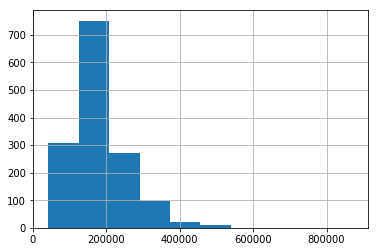

In [30]:
submission['SalePrice'].hist()

In [31]:
ridge.coef_

array([-0.08456505,  0.00426403, -0.00282362, -0.03923123, -0.01797394,
       -0.08099968, -0.07749651, -0.0390009 , -0.00962047, -0.04408267,
       -0.04988436, -0.07635859, -0.07429303, -0.00241774,  0.00985534,
       -0.01954168,  0.00931724,  0.01867922, -0.02340767,  0.00429152,
       -0.0564036 , -0.00874853, -0.00673082,  0.0037055 ,  0.00822833,
        0.01106227, -0.01034466,  0.01649595, -0.00754394, -0.01062801,
       -0.16302926,  0.07604578,  0.04609267, -0.01937462, -0.01228426,
        0.00446403,  0.00795944,  0.02061369,  0.00255584,  0.02493555,
        0.01045349,  0.0342937 , -0.00382264, -0.0082037 ,  0.00649909,
        0.00289544, -0.0021568 , -0.00176519,  0.00480185, -0.01017917,
        0.00347075,  0.00102515, -0.01005606, -0.00904367, -0.01350491,
       -0.00302468, -0.05181087, -0.03288529, -0.01269174, -0.04966139,
        0.0034347 , -0.18470979, -0.00216888, -0.0608992 ,  0.01899338,
        0.01627538,  0.01643221,  0.00223417,  0.01627538,  0.01

In [38]:
coef_mask = [True if abs(x) > .01 else False for x in ridge.coef_]